In [1]:
import vectorbt as vbt
import numpy, pandas

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/telegram/utils/request.py:49: UserWarning: python-telegram-bot is using upstream urllib3. This is allowed but not supported by python-telegram-bot maintainers.
  warnings.warn(


In [6]:
start = "2016-01-01 UTC"
end = "2021-12-15 UTC"
price = vbt.YFData.download("AAPL", start=start, end=end).get("Close")

In [8]:
price.head()

Date
2016-01-04 05:00:00+00:00    23.886835
2016-01-05 05:00:00+00:00    23.288246
2016-01-06 05:00:00+00:00    22.832497
2016-01-07 05:00:00+00:00    21.868868
2016-01-08 05:00:00+00:00    21.984499
Name: Close, dtype: float64

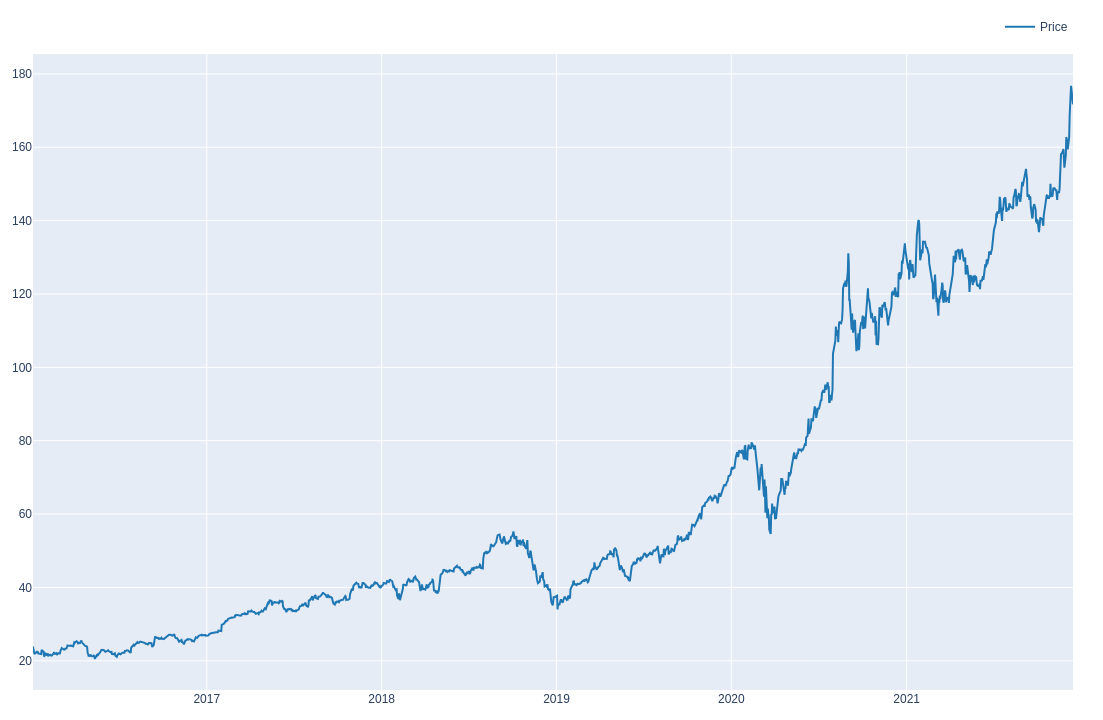

In [7]:
# plot the price

figure = price.vbt.plot(trace_names=["Price"], width=1280, height=720)
figure.show()

In [9]:
#show returns from optimizing

windows = numpy.arange(10, 50)
fast_ma, slow_ma = vbt.MA.run_combs(price, windows)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(price, entries, exits, freq='1d', direction='both')
print(portfolio.total_return().sort_values())

ma_1_window  ma_2_window
38           48            -0.511169
             49            -0.507035
40           45            -0.496004
36           48            -0.477494
39           47            -0.471214
                              ...   
18           23             4.463847
19           22             4.548140
18           19             4.565929
17           19             5.070014
18           20             5.666303
Name: total_return, Length: 780, dtype: float64


In [10]:
windows

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [13]:
# show how it performs poorly on data it hasn't seen
start = "2021-12-16 UTC"
end = "2022-06-01 UTC"
future_data = vbt.YFData.download("AAPL", start=start, end=end).get("Close")


In [15]:
fast_ma = vbt.MA.run(future_data, 30)
slow_ma = vbt.MA.run(future_data, 40)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(future_data, entries, exits, freq='1d', direction='both')
print(portfolio.total_return())

-0.050684114728019265


In [25]:
fast_ma = vbt.MA.run(future_data, 10)
slow_ma = vbt.MA.run(future_data, 11)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(future_data, entries, exits, freq='1d', direction='both')
print(portfolio.total_return())

-0.21784873349107556


/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant

/home/diti/miniconda3/envs/devbox/lib/python3.12/site-packages/jupyter_client/session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



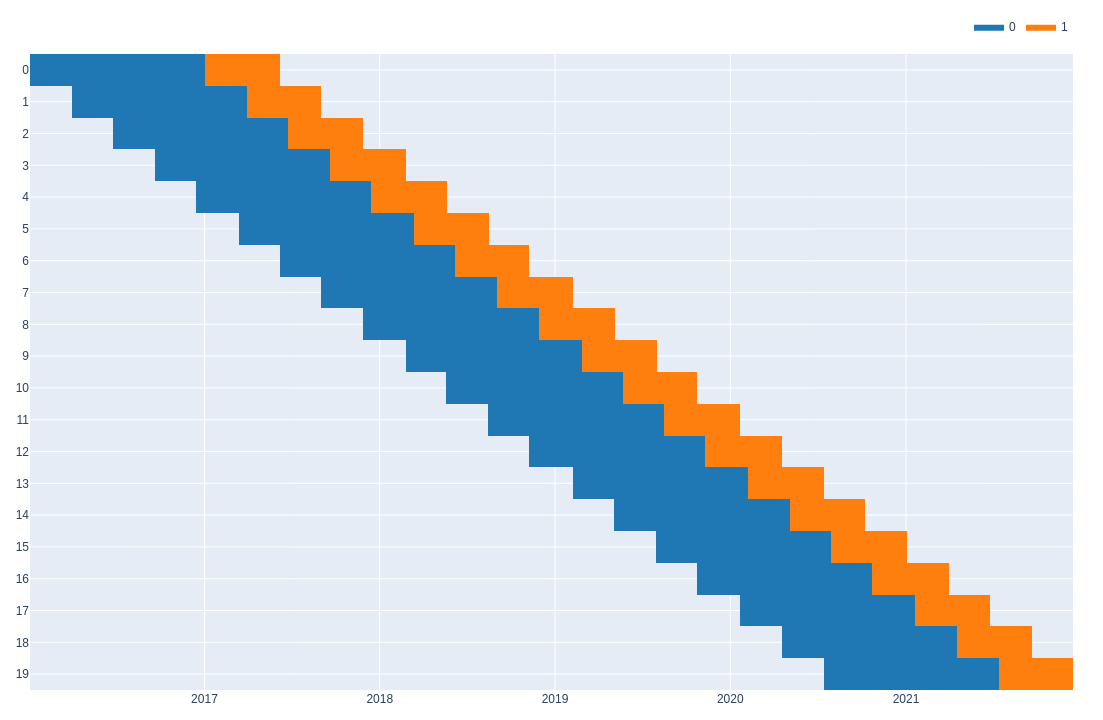

In [18]:
#show split data on a figure
figure = price.vbt.rolling_split(n=20, window_len=360, set_lens=(108,), left_to_right=False, plot=True)
figure.update_layout(width=1280, height=720)
figure.show()

In [19]:
#store split data in tuples
(in_sample_prices, in_sample_dates),(out_sample_prices, out_sample_dates) = price.vbt.rolling_split(
    n=20, window_len=360, set_lens=(108,), left_to_right=False
) 

In [20]:
print(in_sample_dates)
print(out_sample_dates)
print(out_sample_prices[19])

[DatetimeIndex(['2016-01-04 05:00:00+00:00', '2016-01-05 05:00:00+00:00',
               '2016-01-06 05:00:00+00:00', '2016-01-07 05:00:00+00:00',
               '2016-01-08 05:00:00+00:00', '2016-01-11 05:00:00+00:00',
               '2016-01-12 05:00:00+00:00', '2016-01-13 05:00:00+00:00',
               '2016-01-14 05:00:00+00:00', '2016-01-15 05:00:00+00:00',
               ...
               '2016-12-16 05:00:00+00:00', '2016-12-19 05:00:00+00:00',
               '2016-12-20 05:00:00+00:00', '2016-12-21 05:00:00+00:00',
               '2016-12-22 05:00:00+00:00', '2016-12-23 05:00:00+00:00',
               '2016-12-27 05:00:00+00:00', '2016-12-28 05:00:00+00:00',
               '2016-12-29 05:00:00+00:00', '2016-12-30 05:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='split_0', length=252, freq=None), DatetimeIndex(['2016-03-31 04:00:00+00:00', '2016-04-01 04:00:00+00:00',
               '2016-04-04 04:00:00+00:00', '2016-04-05 04:00:00+00:00',
               '2016

In [23]:
# run combinations on in sample dates, sort by sharpe ratio

windows = numpy.arange(10, 50)
fast_ma, slow_ma = vbt.MA.run_combs(in_sample_prices, windows)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(in_sample_prices, entries, exits, freq='1d', direction='both')
performance = portfolio.sharpe_ratio()
print(performance[performance.groupby('split_idx').idxmax()].index)

MultiIndex([(10, 11,  0),
            (10, 48,  1),
            (35, 42,  2),
            (16, 22,  3),
            (11, 14,  4),
            (12, 13,  5),
            (48, 49,  6),
            (48, 49,  7),
            (23, 25,  8),
            (18, 26,  9),
            (14, 28, 10),
            (13, 15, 11),
            (15, 22, 12),
            (15, 22, 13),
            (13, 19, 14),
            (30, 31, 15),
            (15, 16, 16),
            (35, 39, 17),
            (20, 21, 18),
            (20, 21, 19)],
           names=['ma_1_window', 'ma_2_window', 'split_idx'])
